In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly 
import os

In [2]:
# Load the data csv
merged_population_data = pd.read_csv(r'C:\Users\user\Documents\population_data\merged_population_data.csv')

In [3]:
merged_population_data.head()

,year,5yr,10yr,15yr
0,2001,160922740.0,160922740.0,160922740.0
1,2002,161730679.0,161730679.0,161730679.0
2,2003,162537747.0,162537747.0,162537747.0
3,2004,163460914.0,163460914.0,163460914.0
4,2005,164770667.0,164770667.0,164770667.0


In [4]:
merged_population_data = pd.melt(merged_population_data, id_vars=['year'], var_name='projection', value_name='value')


In [5]:
merged_population_data
#save the data to a csv file
merged_population_data.to_csv(r'C:\Users\user\Documents\population_data\merged_population_long_data.csv', index=False)

<Axes: xlabel='year', ylabel='value'>

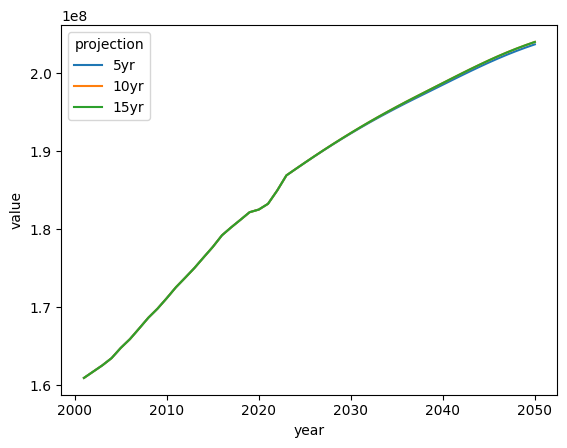

In [6]:
# Plot merged_population_data mutiple line plot
sns.lineplot(data=merged_population_data, x='year', y='value', hue='projection')

In [7]:
merged_population_data
#min and max values of value
min_value = merged_population_data['value'].min()
max_value = merged_population_data['value'].max()
#save values as list
min_max_values = [min_value, max_value]

In [8]:
#use plotly to plot merged_population_data
fig = px.line(merged_population_data, x='year', y='value', color='projection', title='Population Projection')
#add dots to the plot
fig.update_traces(mode='markers+lines')
#add x and y axis labels
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Population')
#add a line to show where the dash lines start to diverge   
fig.add_shape(type='line', x0=2015, y0=0, x1=2015, y1=2000000000, line=dict(color='red', width=2, dash='dash'))
#fit axis to the data min and max of values in value column
fig.update_yaxes(range=min_max_values)
#increase range of y axis by 5%
fig.update_yaxes(range=[min_value*0.95, max_value*1.05])
#show fig
fig.show()

In [11]:
#check data for missing values
missing_values = merged_population_data.isnull().sum()
missing_values

year          0
projection    0
value         0
dtype: int64

year          0
projection    0
value         0
dtype: int64